<a href="https://colab.research.google.com/github/seungeunlee00/JUNIA/blob/main/AML/MNIST_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

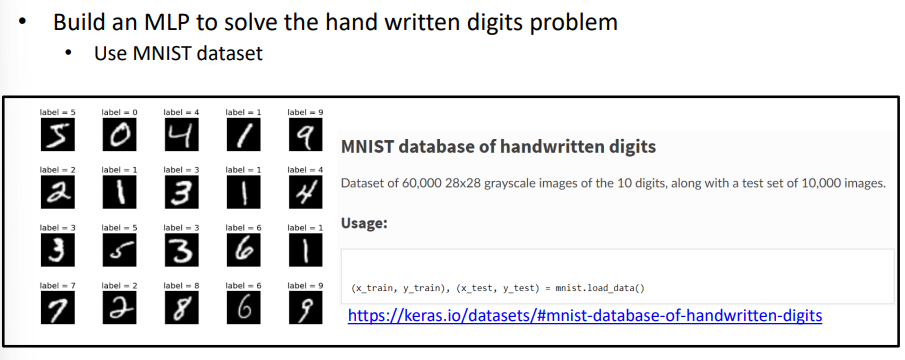

# Build an MLP to solve the hand written digits problem

## 1. Simple

In [ ]:
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
history = model.fit(x_train, y_train, epochs=5)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2013 - accuracy: 0.9406
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0807 - accuracy: 0.9757
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0526 - accuracy: 0.9835
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0385 - accuracy: 0.9877
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0675 - accuracy: 0.9802
테스트 정확도: 0.9801999926567078


## 2. hard

Dataset 전처리

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [ ]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1,28,28,1)/255.
x_test = x_test.reshape(-1,28,28,1)/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Model 구성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Conv2D

model = Sequential()
model.add(Conv2D(32,(2,2),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(32,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

Model Train

In [ ]:
model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics=["acc"])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 293s 156ms/step - loss: 0.0098 - acc: 0.9972 - val_loss: 0.0603 - val_acc: 0.9904
Epoch 2/10
1875/1875 [==============================] - 276s 147ms/step - loss: 0.0111 - acc: 0.9968 - val_loss: 0.0416 - val_acc: 0.9917
Epoch 3/10
1875/1875 [==============================] - 277s 147ms/step - loss: 0.0068 - acc: 0.9976 - val_loss: 0.0377 - val_acc: 0.9932
Epoch 4/10
1875/1875 [==============================] - 275s 147ms/step - loss: 0.0087 - acc: 0.9972 - val_loss: 0.0640 - val_acc: 0.9895
Epoch 5/10
1875/1875 [==============================] - 276s 147ms/step - loss: 0.0060 - acc: 0.9984 - val_loss: 0.0738 - val_acc: 0.9878
Epoch 6/10
1875/1875 [==============================] - 276s 147ms/step - loss: 0.0067 - acc: 0.9982 - val_loss: 0.0522 - val_acc: 0.9908
Epoch 7/10
1875/1875 [==============================] - 278s 148ms/step - loss: 0.0060 - acc: 0.9985 - val_loss: 0.0546 - val_acc: 0.9914
Epoch 8/10
1875/1875 [============

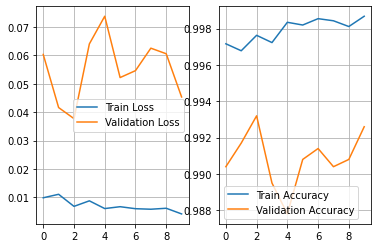

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
acc = history.history["acc"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]
plt.subplot(1,2,1)
plt.plot(range(len(loss)),loss,label = "Train Loss")
plt.plot(range(len(val_loss)),val_loss,label = "Validation Loss")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(acc)),acc,label = "Train Accuracy")
plt.plot(range(len(val_acc)),val_acc,label = "Validation Accuracy")
plt.grid()
plt.legend()
plt.show()

결과 확인 및 예측

TypeError: ignored

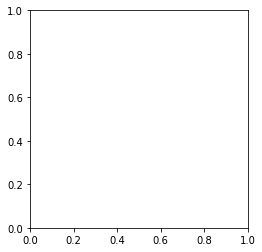

In [ ]:
import random

index = random.randint(0,9999)
plt.imshow(x_test[index],cmap="gray")
predict = model.predict(x_test[index].reshape(1,28,28,1))
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[index]),np.argmax(predict)),)

In [ ]:
wrong_index_list=[]
predict = model.predict(x_test)
for index in range(10000):
    if np.argmax(y_test[index]) != np.argmax(predict[index]):
        wrong_index_list.append(index)
print(wrong_index_list)
print("총 틀린 갯수 : ",len(wrong_index_list))

In [ ]:
new_index = random.choice(wrong_index_list)
plt.imshow(x_test[new_index],cmap="gray")
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[new_index]),np.argmax(new_index)),)

## 3. ppt

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
# load data
mnist = tf.keras.datasets.mnist

# the data, split between train and validation sets
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

# convert images into one dimension from 28x28 pixels
x_train = x_train.reshape(60000, 784)
x_validation = x_validation.reshape(10000, 784)
x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')

# normalize into [0,1] 
x_train /= 255
x_validation /= 255

print('train samples', x_train.shape)
print('test samples', x_validation.shape)
print('train label samples', y_train.shape)
print('test label samples', y_validation.shape)

train samples (60000, 784)
test samples (10000, 784)
train label samples (60000,)
test label samples (10000,)


In [ ]:
# 모델 구성
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32,(2,2),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(32,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

Save your best model during training and keep history of training metrics

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

# compile the model with adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train model with fit for 10 epochs
history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=10, callbacks=[checkpointer])

Epoch 1/10


ValueError: ignored